# EDA for Features 1-14
## Loading the data


In [32]:
import pandas as pd

# Load mergred and reduced dataset
df = pd.read_csv('../../data/old/E_modeling_base/modeling_base_2023.csv', sep=";")
print("Total Rows:",len(df))
print("Total Columns: ",len(df.columns))
print("Rows containing fatal injuries:", (df["injury_severity"] == 4).sum()) 



Total Rows: 125789
Total Columns:  49
Rows containing fatal injuries: 49603


In [33]:
#Select first 14 collums + Target Value for EDA
df_eda = df.iloc[:, :14]
df_eda['injury_severity'] = df['injury_severity']
df_eda.head(20)

,hour_minute,lighting_condition,location,intersection,weather_condition,type_of_collision,latitude,longitude,road_category,traffic_regime,number_of_traffic_lanes,reserved_lane_present,longitudinal_profile,horizontal_alignment,injury_severity
0,06:00,1,2,4,2,7,"48,86638600","2,32347100",4,1,1,0,1,1,4
1,05:30,5,2,1,3,6,"48,84547782","2,42868146",3,2,3,2,1,1,1
2,05:30,5,2,1,3,6,"48,84547782","2,42868146",3,2,3,2,1,1,3
3,20:50,1,2,3,2,1,"48,76240000","2,40655000",3,2,4,0,1,1,3
4,20:50,1,2,3,2,1,"48,76240000","2,40655000",3,2,4,0,1,1,1
5,23:57,5,2,1,3,5,"48,73248432","2,44687575",2,2,4,0,1,1,1
6,23:57,5,2,1,3,5,"48,73248432","2,44687575",2,2,4,0,1,1,1
7,23:57,5,2,1,3,5,"48,73248432","2,44687575",2,2,4,0,1,1,1
8,23:57,5,2,1,3,5,"48,73248432","2,44687575",2,2,4,0,1,1,4
9,23:57,5,2,1,3,5,"48,73248432","2,44687575",2,2,4,0,1,1,1


## General Overview

In [29]:
print(df_eda.info())
print("Shape of dataset:", df_eda.shape)
print("\nData types:\n", df_eda.dtypes)
print("\nMissing values per column:\n", df_eda.isnull().sum())
print("\nUnique values per column:\n", df_eda.nunique())

# Quick summary statistics
df_eda.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125789 entries, 0 to 125788
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hour_minute              125789 non-null  object 
 1   lighting_condition       125789 non-null  int64  
 2   location                 125789 non-null  int64  
 3   intersection             125789 non-null  int64  
 4   weather_condition        125789 non-null  int64  
 5   type_of_collision        125789 non-null  int64  
 6   latitude                 125789 non-null  float64
 7   longitude                125789 non-null  float64
 8   road_category            125789 non-null  int64  
 9   traffic_regime           125789 non-null  int64  
 10  number_of_traffic_lanes  125789 non-null  object 
 11  reserved_lane_present    125789 non-null  int64  
 12  longitudinal_profile     125789 non-null  int64  
 13  horizontal_alignment     125789 non-null  int64  
 14  inju

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hour_minute,125789,1409,18:00,1627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lighting_condition,125789.0,NaN,NaN,NaN,1.934827,1.482221,-1.0,1.0,1.0,3.0,5.0
location,125789.0,NaN,NaN,NaN,1.604671,0.488923,1.0,1.0,2.0,2.0,2.0
intersection,125789.0,NaN,NaN,NaN,2.085222,2.020726,-1.0,1.0,1.0,2.0,9.0
weather_condition,125789.0,NaN,NaN,NaN,1.627352,1.681256,-1.0,1.0,1.0,1.0,9.0
type_of_collision,125789.0,NaN,NaN,NaN,3.763652,1.870551,-1.0,2.0,3.0,6.0,7.0
latitude,125789.0,NaN,NaN,NaN,44.113166,12.650191,-23.372504,44.73205,47.79838,48.859956,51.04749
longitude,125789.0,NaN,NaN,NaN,1.945381,19.739064,-176.207,1.22606,2.394759,4.78418,168.09567
road_category,125789.0,NaN,NaN,NaN,3.257042,1.219698,1.0,3.0,3.0,4.0,9.0
traffic_regime,125789.0,NaN,NaN,NaN,1.78204,0.939098,-1.0,2.0,2.0,2.0,4.0


In [ ]:
# Checking for -1 values in the dataset
neg1_counts = (df_eda == -1).sum()
neg1_counts = neg1_counts[neg1_counts > 0]
print(neg1_counts)

lighting_condition          3
intersection                9
weather_condition           7
type_of_collision          28
traffic_regime           8066
reserved_lane_present     853
longitudinal_profile       61
horizontal_alignment       25
injury_severity           118
dtype: int64


## Findings

- There are no NaN values in the feature subgroup of the dataset.
- However, for some categories, “not specified” is encoded as -1.
- Entries where injury_severity equals -1 should be dropped.
- For all other columns, except traffic_regime and reserved_lane_present, the number of “not specified” entries is minimal and can be neglected.
- Even for these two categorical features (and all others), the -1 encoding can be retained, as they are non-numerical variables where -1 simply represents an additional category.
  

## Data Cleaning and Feature Engineering
- Number of traffic lanes should be converted from object to numerical values
- hour_minutes could be turned into categorical variable my froming different brackets for example night, morning, afternoon
- When encoding an ordinal categorical feature (e.g., injury severity or driving condition favorability), the numerical values should preserve the inherent order of the categories. Therefore, I recommend mapping the categories to integers that reflect their natural sequence.

In [42]:
# Convert 'number_of_traffic_lanes' to numeric if possible
df['number_of_traffic_lanes'] = pd.to_numeric(df['number_of_traffic_lanes'], errors='coerce')

# Check if any conversions failed
print(df['number_of_traffic_lanes'].isna().sum(), "rows had non-numeric values in 'number_of_traffic_lanes'")

def day_period(h):
    if 5 <= h < 12:
        return "Morning"
    elif 12 <= h < 17:
        return "Afternoon"
    elif 17 <= h < 22:
        return "Evening"
    else:
        return "Night"
df_eda["hour_minute"] = pd.to_datetime(df["hour_minute"], format="%H:%M")
df_eda["hour_minute"].head()
df_eda["hour"] = df_eda["hour_minute"].dt.hour
df_eda["day_period"] = df_eda["hour"].apply(day_period)
df_eda.drop(columns=["hour_minute", "hour"], inplace=True)
df_eda.head()

125 rows had non-numeric values in 'number_of_traffic_lanes'


,lighting_condition,location,intersection,weather_condition,type_of_collision,latitude,longitude,road_category,traffic_regime,number_of_traffic_lanes,reserved_lane_present,longitudinal_profile,horizontal_alignment,injury_severity,day_period
0,1,2,4,2,7,"48,86638600","2,32347100",4,1,1,0,1,1,4,Morning
1,5,2,1,3,6,"48,84547782","2,42868146",3,2,3,2,1,1,1,Morning
2,5,2,1,3,6,"48,84547782","2,42868146",3,2,3,2,1,1,3,Morning
3,1,2,3,2,1,"48,76240000","2,40655000",3,2,4,0,1,1,3,Evening
4,1,2,3,2,1,"48,76240000","2,40655000",3,2,4,0,1,1,1,Evening


### Latitude & Longitude

- **Should be dropped** from use in predictive models, as they may lead to **overfitting**.  
- Each accident typically has a **unique coordinate pair**, meaning these values do not generalize well to unseen data.  
- **Location characteristics** (e.g., `road_category`, `traffic_regime`, or `infrastructure`) already capture spatial context in a more meaningful way for modeling.  
- However, **Latitude** and **Longitude** remain **useful for visualization** purposes, such as plotting accident locations on interactive maps to identify geographic patterns or clusters.

In [24]:
import folium
#Filter for fatal injuries
df_sample = df_eda[df_eda["injury_severity"] == 4]
#sample to reduce number of points on map
df_sample = df_sample.sample(n=10000, random_state=42)

# df_sample["latitude"] = df_sample["latitude"].str.replace(",", ".").astype(float)
# df_sample["longitude"] = df_sample["longitude"].str.replace(",", ".").astype(float)
#Map of France
m = folium.Map(location=[46.5, 2.5], zoom_start=6)

#Add accident data
for _, row in df_sample.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=0.5,
        color="red",
        fill=True,
        fill_opacity=0.6
    ).add_to(m)
#Save interactive map which can be opened in browser    
m.save("accident_map.html")

# Interactive Accident Map that can be accesed trhough browser
![Unfallkarte](imagebigfrance.png)
![Unfallkarte](imagefrance.png)


# Data Analysis

## Lighting Conditions

injury_severity,-1,1,2,3,4
lighting_condition,,,,,
-1,0,0,1,0,2
1,68,36329,1971,12347,32273
2,7,3361,270,1423,3108
3,8,4867,798,3016,5137
4,3,539,64,246,584


injury_severity,-1,1,2,3,4
lighting_condition,,,,,
-1,0.000000,0.000000,0.333333,0.000000,0.666667
1,0.000819,0.437762,0.023750,0.148781,0.388888
2,0.000857,0.411433,0.033052,0.174195,0.380463
3,0.000579,0.352018,0.057717,0.218140,0.371546
4,0.002089,0.375348,0.044568,0.171309,0.406685


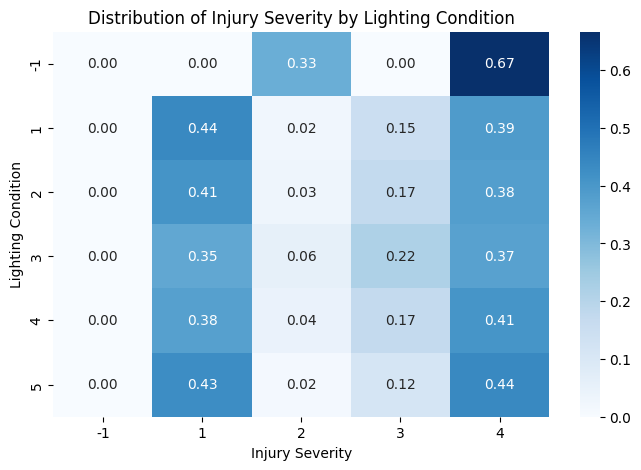

Chi² statistic = 1611.91
Degrees of freedom = 20
p-value = 0.000000
➡️ There is a statistically significant relationship between lighting condition and injury severity.
Cramer's V = 0.056


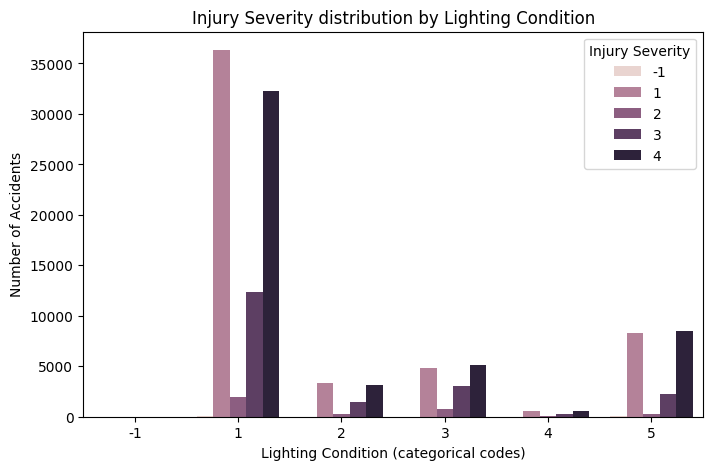

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

ct = pd.crosstab(df_eda["lighting_condition"], df_eda["injury_severity"])
display(ct.head())

ct_norm = pd.crosstab(df_eda["lighting_condition"],
                      df_eda["injury_severity"],
                      normalize="index")
display(ct_norm.head())
plt.figure(figsize=(8, 5))
sns.heatmap(ct_norm, annot=True, cmap="Blues", fmt=".2f")
plt.title("Distribution of Injury Severity by Lighting Condition")
plt.xlabel("Injury Severity")
plt.ylabel("Lighting Condition")
plt.show()

chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi² statistic = {chi2:.2f}")
print(f"Degrees of freedom = {dof}")
print(f"p-value = {p:.6f}")

if p < 0.05:
    print("➡️ There is a statistically significant relationship between lighting condition and injury severity.")
else:
    print("➡️ No statistically significant relationship detected.")
    
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

v = cramers_v(ct)
print(f"Cramer's V = {v:.3f}")

df_grouped = df_eda.groupby(["lighting_condition", "injury_severity"]).size().reset_index(name="count")

plt.figure(figsize=(8, 5))
sns.barplot(x="lighting_condition", y="count", hue="injury_severity", data=df_grouped)
plt.title("Injury Severity distribution by Lighting Condition")
plt.xlabel("Lighting Condition (categorical codes)")
plt.ylabel("Number of Accidents")
plt.legend(title="Injury Severity")
plt.show()

# Weather Conditions

injury_severity,-1,1,2,3,4
weather_condition,,,,,
-1,0,1,2,0,4
1,91,41931,2633,15197,38611
2,19,6293,345,1967,6350
3,2,1446,100,536,1353
4,0,130,8,57,100


injury_severity,-1,1,2,3,4
weather_condition,,,,,
-1,0.000000,0.142857,0.285714,0.000000,0.571429
1,0.000924,0.425855,0.026741,0.154342,0.392137
2,0.001269,0.420262,0.023040,0.131361,0.424068
3,0.000582,0.420716,0.029095,0.155950,0.393657
4,0.000000,0.440678,0.027119,0.193220,0.338983


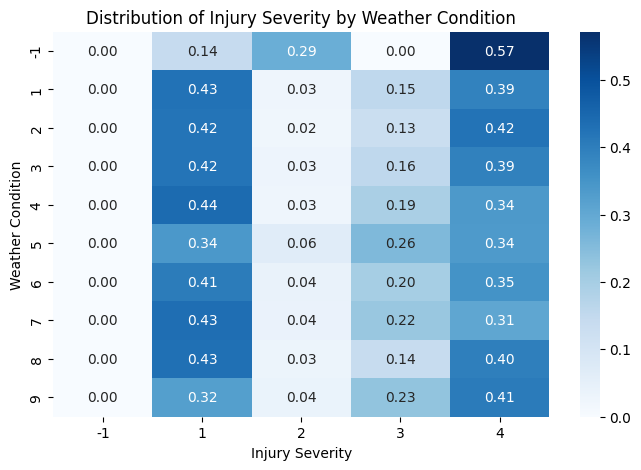

Chi² statistic = 372.40
Degrees of freedom = 36
p-value = 0.000000
➡️ There is a statistically significant relationship between weather condition and injury severity.
Cramer's V = 0.026


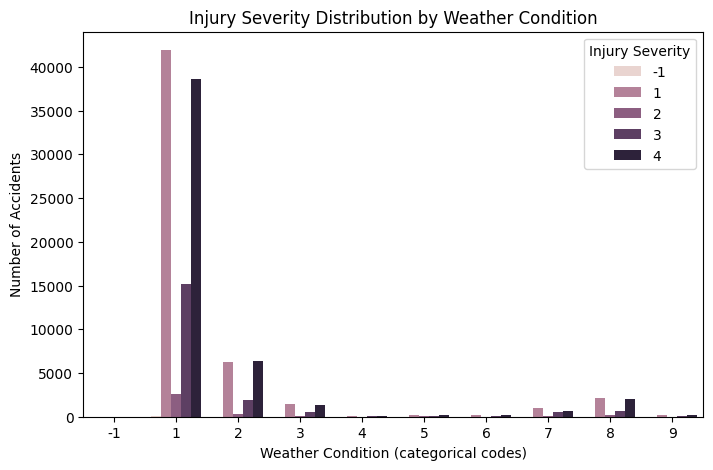

In [ ]:
# --- Crosstabulation: frequency table ---
ct = pd.crosstab(df_eda["weather_condition"], df_eda["injury_severity"])
display(ct.head())

# --- Normalized Crosstab (row percentages) ---
ct_norm = pd.crosstab(
    df_eda["weather_condition"],
    df_eda["injury_severity"],
    normalize="index"
)
display(ct_norm.head())

# --- Visualize as Heatmap ---
plt.figure(figsize=(8, 5))
sns.heatmap(ct_norm, annot=True, cmap="Blues", fmt=".2f")
plt.title("Distribution of Injury Severity by Weather Condition")
plt.xlabel("Injury Severity")
plt.ylabel("Weather Condition")
plt.show()

# ---  Chi-Square Test of Independence ---
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi² statistic = {chi2:.2f}")
print(f"Degrees of freedom = {dof}")
print(f"p-value = {p:.6f}")

if p < 0.05:
    print("There is a statistically significant relationship between weather condition and injury severity.")
else:
    print(" No statistically significant relationship detected.")

# ---  Cramer's V: strength of association ---
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

v = cramers_v(ct)
print(f"Cramer's V = {v:.3f}")

# --- 6️⃣ Grouped bar chart for visual comparison ---
df_grouped = (
    df_eda.groupby(["weather_condition", "injury_severity"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x="weather_condition", y="count", hue="injury_severity", data=df_grouped
)
plt.title("Injury Severity Distribution by Weather Condition")
plt.xlabel("Weather Condition (categorical codes)")
plt.ylabel("Number of Accidents")
plt.legend(title="Injury Severity")
plt.show()

# Collision Type

injury_severity,-1,1,2,3,4
type_of_collision,,,,,
-1,0,10,1,3,14
1,3,5451,648,3349,5690
2,30,8649,222,1503,7788
3,30,18672,417,4638,15469
4,8,4563,51,336,2844


injury_severity,-1,1,2,3,4
type_of_collision,,,,,
-1,0.000000,0.357143,0.035714,0.107143,0.500000
1,0.000198,0.360016,0.042798,0.221188,0.375801
2,0.001649,0.475429,0.012203,0.082619,0.428100
3,0.000765,0.476011,0.010631,0.118238,0.394356
4,0.001025,0.584850,0.006537,0.043066,0.364522


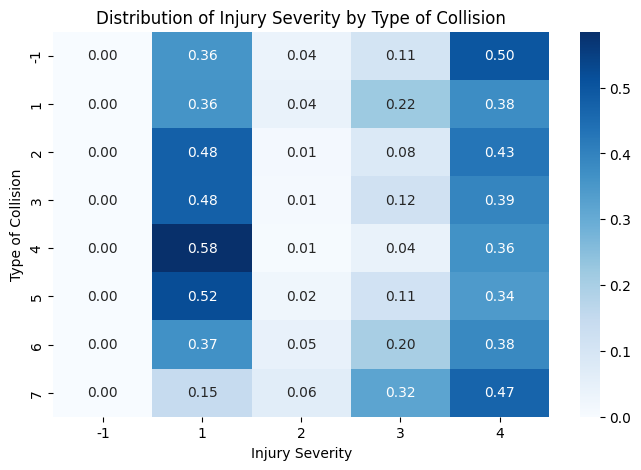

Chi² statistic = 8379.10
Degrees of freedom = 28
p-value = 0.000000
➡️ There is a statistically significant relationship between type of collision and injury severity.
Cramer's V = 0.129


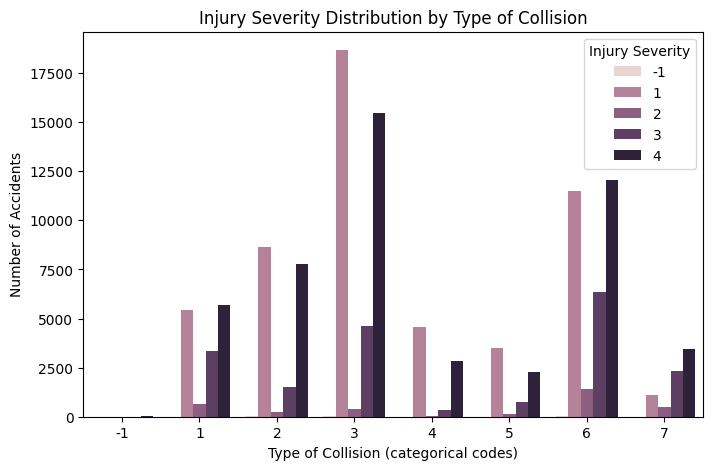

In [52]:
# --- 1️⃣ Crosstabulation: frequency table ---
ct = pd.crosstab(df_eda["type_of_collision"], df_eda["injury_severity"])
display(ct.head())

# --- 2️⃣ Normalized Crosstab (row percentages) ---
ct_norm = pd.crosstab(
    df_eda["type_of_collision"],
    df_eda["injury_severity"],
    normalize="index"
)
display(ct_norm.head())

# --- 3️⃣ Visualize as Heatmap ---
plt.figure(figsize=(8, 5))
sns.heatmap(ct_norm, annot=True, cmap="Blues", fmt=".2f")
plt.title("Distribution of Injury Severity by Type of Collision")
plt.xlabel("Injury Severity")
plt.ylabel("Type of Collision")
plt.show()

# --- 4️⃣ Chi-Square Test of Independence ---
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi² statistic = {chi2:.2f}")
print(f"Degrees of freedom = {dof}")
print(f"p-value = {p:.6f}")

if p < 0.05:
    print("➡️ There is a statistically significant relationship between type of collision and injury severity.")
else:
    print("➡️ No statistically significant relationship detected.")

# --- 5️⃣ Cramer's V: strength of association ---
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

v = cramers_v(ct)
print(f"Cramer's V = {v:.3f}")

# --- 6️⃣ Grouped bar chart for visual comparison ---
df_grouped = (
    df_eda.groupby(["type_of_collision", "injury_severity"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x="type_of_collision", y="count", hue="injury_severity", data=df_grouped
)
plt.title("Injury Severity Distribution by Type of Collision")
plt.xlabel("Type of Collision (categorical codes)")
plt.ylabel("Number of Accidents")
plt.legend(title="Injury Severity")
plt.show()

## Intersection type

injury_severity,-1,1,2,3,4
intersection,,,,,
-1,0,3,0,0,6
1,72,32047,2725,13373,30932
2,20,7578,194,1890,6842
3,9,6804,197,1922,5716
4,0,1161,37,393,966


injury_severity,-1,1,2,3,4
intersection,,,,,
-1,0.000000,0.333333,0.000000,0.000000,0.666667
1,0.000910,0.404895,0.034429,0.168960,0.390807
2,0.001210,0.458606,0.011740,0.114379,0.414064
3,0.000614,0.464500,0.013449,0.131212,0.390224
4,0.000000,0.454048,0.014470,0.153696,0.377786


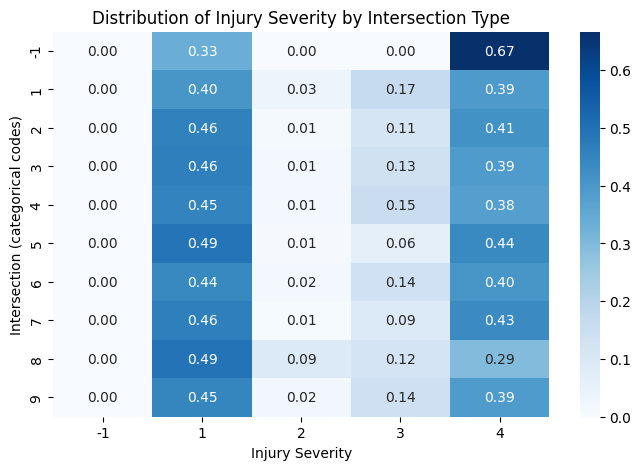

Chi² statistic = 1199.06
Degrees of freedom = 36
p-value = 0.000000
There is a statistically significant relationship between intersection type and injury severity.
Cramer's V = 0.048


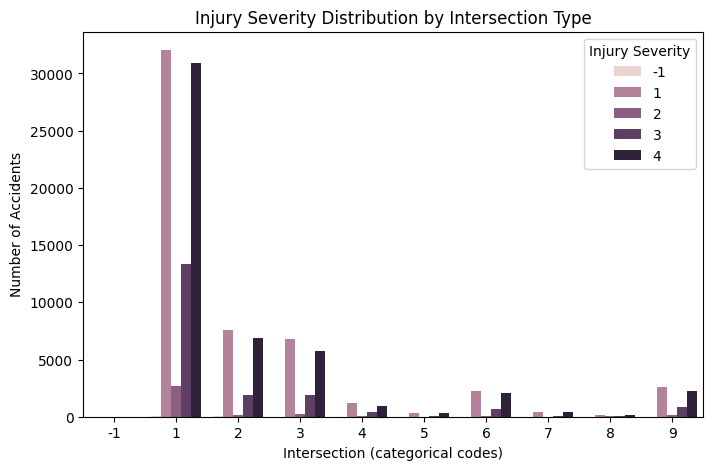

In [53]:
# 1. Crosstabulation: frequency table
ct = pd.crosstab(df_eda["intersection"], df_eda["injury_severity"])
display(ct.head())

# 2. Normalized Crosstab (row percentages)
ct_norm = pd.crosstab(
    df_eda["intersection"],
    df_eda["injury_severity"],
    normalize="index"
)
display(ct_norm.head())

# 3. Visualize as Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(ct_norm, annot=True, cmap="Blues", fmt=".2f")
plt.title("Distribution of Injury Severity by Intersection Type")
plt.xlabel("Injury Severity")
plt.ylabel("Intersection (categorical codes)")
plt.show()

# 4. Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi² statistic = {chi2:.2f}")
print(f"Degrees of freedom = {dof}")
print(f"p-value = {p:.6f}")

if p < 0.05:
    print("There is a statistically significant relationship between intersection type and injury severity.")
else:
    print("No statistically significant relationship detected.")

# 5. Cramer's V: strength of association
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

v = cramers_v(ct)
print(f"Cramer's V = {v:.3f}")

# 6. Grouped bar chart for visual comparison
df_grouped = (
    df_eda.groupby(["intersection", "injury_severity"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x="intersection", y="count", hue="injury_severity", data=df_grouped
)
plt.title("Injury Severity Distribution by Intersection Type")
plt.xlabel("Intersection (categorical codes)")
plt.ylabel("Number of Accidents")
plt.legend(title="Injury Severity")
plt.show()

## Location

injury_severity,-1,1,2,3,4
location,,,,,
1,27,19171,2288,10485,17757
2,91,34228,1110,8786,31846


injury_severity,-1,1,2,3,4
location,,,,,
1,0.000543,0.385517,0.046010,0.210847,0.357083
2,0.001196,0.450007,0.014594,0.115513,0.418690


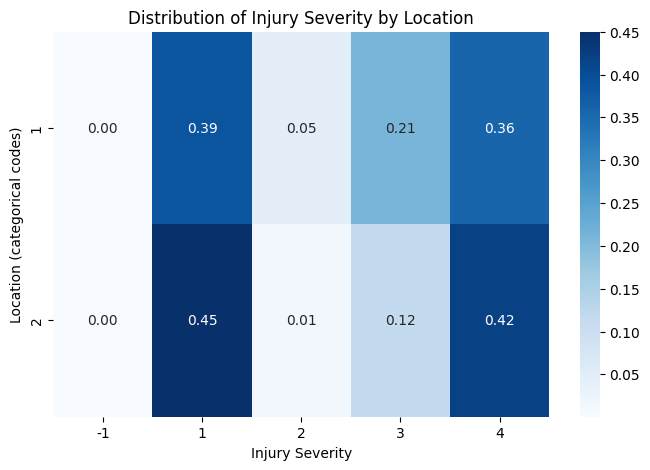

Chi² statistic = 3480.20
Degrees of freedom = 4
p-value = 0.000000
There is a statistically significant relationship between location and injury severity.
Cramer's V = 0.166


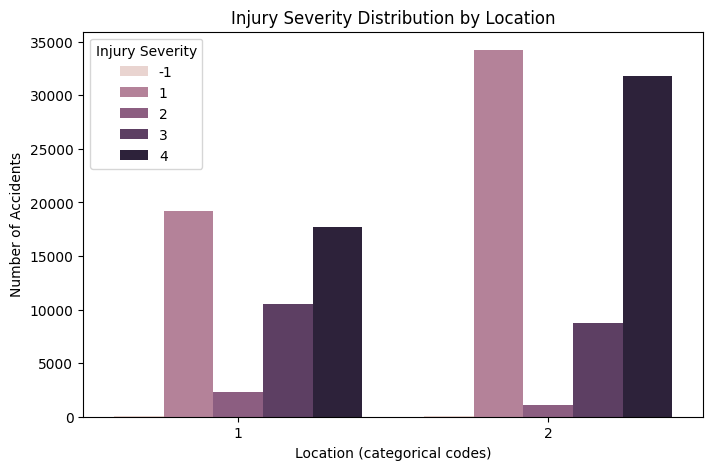

In [54]:
ct = pd.crosstab(df_eda["location"], df_eda["injury_severity"])
display(ct.head())

# 2. Normalized Crosstab (row percentages)
ct_norm = pd.crosstab(
    df_eda["location"],
    df_eda["injury_severity"],
    normalize="index"
)
display(ct_norm.head())

# 3. Visualize as Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(ct_norm, annot=True, cmap="Blues", fmt=".2f")
plt.title("Distribution of Injury Severity by Location")
plt.xlabel("Injury Severity")
plt.ylabel("Location (categorical codes)")
plt.show()

# 4. Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi² statistic = {chi2:.2f}")
print(f"Degrees of freedom = {dof}")
print(f"p-value = {p:.6f}")

if p < 0.05:
    print("There is a statistically significant relationship between location and injury severity.")
else:
    print("No statistically significant relationship detected.")

# 5. Cramer's V: strength of association
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

v = cramers_v(ct)
print(f"Cramer's V = {v:.3f}")

# 6. Grouped bar chart for visual comparison
df_grouped = (
    df_eda.groupby(["location", "injury_severity"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x="location", y="count", hue="injury_severity", data=df_grouped
)
plt.title("Injury Severity Distribution by Location")
plt.xlabel("Location (categorical codes)")
plt.ylabel("Number of Accidents")
plt.legend(title="Injury Severity")
plt.show()